In [1]:
# Copyright (c) 2018-present, Royal Bank of Canada.
# All rights reserved.
#
# This source code is licensed under the license found in the
# LICENSE file in the root directory of this source tree.

In [2]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn import datasets
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
%matplotlib inline

from pltutils import show3d
from wsd import get_wsd_scores

Failed to load GPU Faiss: No module named 'swigfaiss_gpu'
Faiss falling back to CPU-only.


In [3]:
np.random.seed(0)
data, color = datasets.samples_generator.make_swiss_roll(
    1000, random_state=0)
y = PCA(n_components=2).fit_transform(data)
n_neighbors = 10
discontinuity, manytoone = get_wsd_scores(data, y, n_neighbors)
vmax = np.percentile(np.hstack(
    (discontinuity,
     manytoone)), 95)

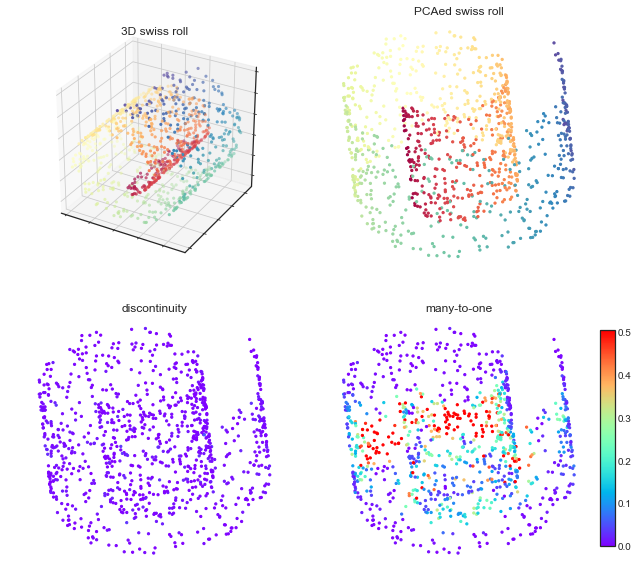

In [4]:
sns.set_style("white")
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(221, projection='3d')
plt.title("3D swiss roll")
show3d(data, color, ax)

plt.subplot(2, 2, 2)
plt.title("PCAed swiss roll")
plt.scatter(y[:, 0], y[:, 1], c=color, s=5., cmap=plt.cm.Spectral)
plt.axis("off")

plt.subplot(2, 2, 3)
plt.title("discontinuity")
plt.scatter(y[:, 0], y[:, 1], c=discontinuity, vmax=vmax,
            s=5., cmap=plt.cm.rainbow)
plt.axis("off")

plt.subplot(2, 2, 4)
plt.title("many-to-one")
img = plt.scatter(y[:, 0], y[:, 1], c=manytoone, vmax=vmax,
                  s=5., cmap=plt.cm.rainbow)
plt.axis("off")

cbax = fig.add_axes([0.92, 0.15, 0.02, 0.3])
cb = plt.colorbar(img, cax=cbax)
cb.outline.set_linewidth(0.)
plt.clim(0., vmax)

plt.show()